# Distance Functions and Matrices

by Chris North, Virginia Tech

Data files: State_demographics.csv, Cities.csv



## Similarity
* Similarity == compare data rows
    * Clusters, outliers, nearest neighbors, ...
    * Online shopping "other simlar products" 
    * TED talks, books, movies
    * Neural networks: text/audio/image/video &rarr; multi-dimensional representation
    
* What makes data points similar?
    * What makes multi-dimensional data points similar?
    
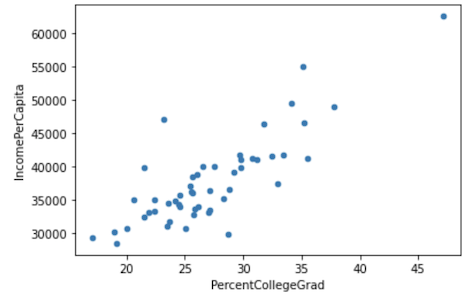
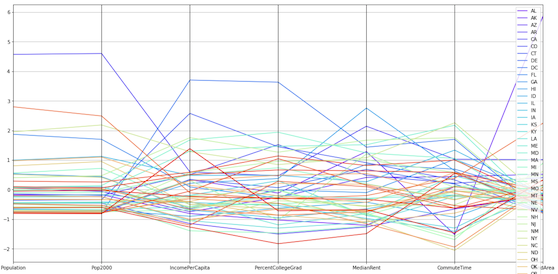

* Multi-dimensional data analysis
    * Later: simplifying big data tables via Dimension reduction & clustering

## Distance Metric
* $dist(P,Q)$ == distance between data points P and Q
* To be a proper distance metric, a function d must have the following properties:
    * positivity: $dist(P,Q) \ge 0$
    * symmetry: $dist(P,Q) = dist(Q,P)$
    * identity-discerning: $dist(P,Q) = 0 \implies P = Q$
    * triangle inequality: $dist(P,R) \le dist(P,Q) + dist(Q,R)$
* Z-score normalization: https://en.wikipedia.org/wiki/Standard_score 
    * Why do we typically need to normalize our data first?



## High-dimensional Distance Functions

### Distance functions for Quantitative data

Is VA more like MD, NC, or CA?

In [1]:
### 
import pandas
import numpy

In [3]:
### quantitative dataset
states = pandas.read_csv('data/State_demographics.csv')
states.index = states.Abbrev  # make an easier index
states.head()

,State,Abbrev,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Employment.Private Non-farm Employment,Employment.Private Non-farm Employment Percent Change,...,Sales.Merchant Wholesaler Sales,Sales.Retail Sales,Sales.Retail Sales per Capita,Employment.Firms.American Indian-Owned,Employment.Firms.Asian-Owned,Employment.Firms.Black-Owned,Employment.Firms.Hispanic-Owned,Employment.Firms.Native Hawaiian and Other Pacific Islander-Owned,Employment.Firms.Total,Employment.Firms.Women-Owned
Abbrev,,,,,,,,,,,,,,,,,,,,,
AL,Alabama,AL,15.3,22.8,6.1,22.6,83.1,311578,1603100,1.1,...,522527,573448,12364,0.8,1.8,14.8,1.2,0.1,382350,28.1
AK,Alaska,AK,9.4,25.3,7.4,27.5,91.6,52991,266627,3.3,...,45636,93033,13635,10.0,3.1,1.5,0.0,0.3,68728,25.9
AZ,Arizona,AZ,15.9,24.1,6.4,26.9,85.7,420233,2173205,1.8,...,575734,867588,13637,1.9,3.3,2.0,10.7,0.0,491529,28.1
AR,Arkansas,AR,15.7,23.8,6.5,20.1,83.7,191530,978094,0.0,...,296597,329742,11602,1.1,1.4,5.5,2.3,0.1,238994,24.5
CA,California,CA,12.9,23.6,6.5,30.7,81.2,2983996,13401863,3.5,...,5984564,4550322,12561,1.3,14.9,4.0,16.5,0.3,3425510,30.3


In [4]:
states.shape

(51, 52)

In [5]:
### zscore normalize quantitative data
quant = states.iloc[:,2:]
norm = (quant - quant.mean())/quant.std()
norm.head()

,Age.Percent 65 and Older,Age.Percent Under 18 Years,Age.Percent Under 5 Years,Education.Bachelor's Degree or Higher,Education.High School or Higher,Employment.Nonemployer Establishments,Employment.Private Non-farm Employment,Employment.Private Non-farm Employment Percent Change,Employment.Private Non-farm Establishments,Ethnicities.American Indian and Alaska Native Alone,...,Sales.Merchant Wholesaler Sales,Sales.Retail Sales,Sales.Retail Sales per Capita,Employment.Firms.American Indian-Owned,Employment.Firms.Asian-Owned,Employment.Firms.Black-Owned,Employment.Firms.Hispanic-Owned,Employment.Firms.Native Hawaiian and Other Pacific Islander-Owned,Employment.Firms.Total,Employment.Firms.Women-Owned
Abbrev,,,,,,,,,,,,,,,,,,,,,
AL,0.296858,-0.048899,-0.199591,-1.020680,-1.401441,-0.248561,-0.279578,-0.483221,-0.302358,-0.416773,...,-0.265153,-0.229814,-0.544343,-0.188130,-0.343515,1.456800,-0.579649,-0.115542,-0.240541,0.203726
AK,-2.975103,1.150063,1.746423,-0.187125,1.242270,-0.709269,-0.801545,1.330070,-0.775419,4.317845,...,-0.692404,-0.796812,0.131508,5.294524,-0.150996,-0.672369,-0.799169,0.035551,-0.736422,-0.703341
AZ,0.629600,0.574561,0.249489,-0.289193,-0.592777,-0.054977,-0.056920,0.093735,-0.086365,1.127854,...,-0.217485,0.117337,0.132572,0.467404,-0.121377,-0.592325,1.158221,-0.191089,-0.067914,0.203726
AR,0.518686,0.430686,0.399183,-1.445963,-1.214826,-0.462443,-0.523677,-1.389867,-0.503752,-0.316036,...,-0.467566,-0.517442,-0.949534,-0.009348,-0.402751,-0.032018,-0.378422,-0.115542,-0.467207,-1.280565
CA,-1.034109,0.334769,0.399183,0.357238,-1.992389,4.512719,4.328496,1.494915,4.465543,-0.080984,...,4.628336,4.463793,-0.439588,0.109840,1.596487,-0.272149,2.219237,0.035551,4.571120,1.110793


#### L1 distance (Manhattan, TaxiCab)

* $dist_{L1}(P,Q) = \sum_{i} |P_i-Q_i|$
* https://en.wikipedia.org/wiki/Taxicab_geometry 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/200px-Manhattan_distance.svg.png)


In [10]:
(norm.loc['VA'] - norm.loc['MD']).abs().sum()

18.868852626225546

In [12]:
(norm.loc['VA'] - norm.loc['NC']).abs().sum()

22.85719940266167

In [13]:
(norm.loc['VA'] - norm.loc['CA']).abs().sum()

92.33101775635608

#### L2 distance (Euclidean)

* $dist_{L2}(P,Q) = \sqrt{\sum_{i} (P_i-Q_i)^{2}}$
* https://en.wikipedia.org/wiki/Euclidean_distance 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/300px-Euclidean_distance_2d.svg.png)

In [15]:
((norm.loc['VA'] - norm.loc['MD']) ** 2).sum() ** 0.5

3.644454109901534

In [17]:
((norm.loc['VA'] - norm.loc['NC']) ** 2).sum() ** 0.5

4.715334945738872

In [18]:
((norm.loc['VA'] - norm.loc['CA']) ** 2).sum() ** 0.5

16.980997613209375

#### Lp (Minkowski) distance

* $dist_{Lp}(P,Q) = (\sum_{i} |P_i-Q_i|^{p})^{1/p}$
* https://en.wikipedia.org/wiki/Minkowski_distance
* Lp space: https://en.wikipedia.org/wiki/Lp_space



### Categorical data
Is DC more like Atlanta, NY, or Madrid?

In [20]:
###  categorical dataset
cities = pandas.read_csv('data/Cities.csv')
cities.index = cities.City
cities.head()

,City,Country,Continent,Region,English-speaking,Olympics-hosting,Northern hemisphere?,Western hemisphere?,Over 3M people in city proper?,Prevalence of Petty Crime,...,Distance to nearest airport in miles,Availability of good quality housing,Quality of Electricity provision,Quality of Gas provision,Quality of Water provision,Quality of telecommunications service,Corruption,Climate rating,Healthcare indicators,Education indicators
City,,,,,,,,,,,,,,,,,,,,,
Abidjan,Abidjan,Ivory Coast,Africa,North Africa,0,0,1,0,1,4,...,1,2,2,2,3,2,4,4,5,5
Abu Dhabi,Abu Dhabi,UAE,Middle East,Middle East,0,0,1,0,0,2,...,2,1,2,2,2,1,2,4,3,3
Adelaide,Adelaide,Australia,Oceania,Oceania,0,0,0,0,0,2,...,1,2,1,1,1,1,1,2,1,1
Al Khobar,Al Khobar,Saudi Arabia,Middle East,Middle East,0,0,1,0,0,2,...,1,2,2,3,2,3,4,3,3,4
Algiers,Algiers,Algeria,Africa,North Africa,0,0,1,0,0,4,...,1,3,3,4,4,4,4,4,3,3


In [21]:
cities.shape

(140, 49)

#### Hamming distance (String, Edit)

* $dist_{Ham}(P,Q) = \sum_{i}
\begin{cases}
    0,& \text{if } P_i == Q_i\\
    1,              & \text{otherwise}
\end{cases}$
* = the number of equal entries
* https://en.wikipedia.org/wiki/Hamming_distance 


In [23]:
cities.loc["Washington DC"]

City                                           Washington DC
Country                                                  USA
Continent                                      North America
Region                                         North America
English-speaking                                           1
Olympics-hosting                                           0
Northern hemisphere?                                       1
Western hemisphere?                                        1
Over 3M people in city proper?                             0
Prevalence of Petty Crime                                  2
Prevalence of Violent crime                                2
Threat of military conflict                                1
Threat of civil unrest                                     2
Threat of terrorism                                        2
Availability of private healthcare                         1
Quality of private healthcare provision                    1
Availability of public h

In [26]:
cities.loc["New York"]

City                                                New York
Country                                                  USA
Continent                                      North America
Region                                         North America
English-speaking                                           1
Olympics-hosting                                           0
Northern hemisphere?                                       1
Western hemisphere?                                        1
Over 3M people in city proper?                             1
Prevalence of Petty Crime                                  3
Prevalence of Violent crime                                2
Threat of military conflict                                1
Threat of civil unrest                                     2
Threat of terrorism                                        3
Availability of private healthcare                         1
Quality of private healthcare provision                    1
Availability of public h

In [30]:
(cities.loc["Washington DC"] != cities.loc["New York"]).sum()

7

In [32]:
(cities.loc["Washington DC"] != cities.loc["Madrid"]).sum()

13

In [33]:
(cities.loc["Washington DC"] != cities.loc["Atlanta"]).sum()

5

### Weighted distance
* Apply a weight $w_i$ to each data column $i$
* $\sum_{i} w_i = 1$
* Weighted L2: $dist_{w}(P,Q) = \sqrt{\sum_{i} w_i(P_i-Q_i)^{2}}$
* Mahalanobis distance: $w_i=1/\sigma_i^2$, same as L2 of z-score normalized data https://en.wikipedia.org/wiki/Mahalanobis_distance
            

## Distance Matrix

* Compute all distances for all pairs of data rows
* https://en.wikipedia.org/wiki/Distance_matrix

* $M = \begin{bmatrix} 
0 & d_{12} & d_{13} & ... & d_{1n} \\ 
d_{21} & 0 & d_{23} & ... & d_{2n} \\ 
d_{31} & d_{32} & 0 & ... & d_{3n} \\ 
... & ... & ... & ... & ... \\ 
d_{n1} & d_{n2} & d_{n3} & ... & 0 \end{bmatrix}$

* $M_{i,j} = d_{ij} = distance(i, j)$


In [51]:
matrix = pandas.DataFrame(index=states.index, columns=states.index, dtype=float)

In [52]:
for r in range(len(states.index)):
#    matrix.iloc[r, r] = 0
    for c in range(r):
        matrix.iloc[r, c] = matrix.iloc[c, r] = (norm.iloc[r] - norm.iloc[c]).abs().sum()

In [53]:
matrix

Abbrev,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Abbrev,,,,,,,,,,,,,,,,,,,,,
AL,NaN,69.950935,35.447480,17.627941,113.280537,38.732083,37.203060,33.609906,78.974266,62.373998,...,38.717336,13.350655,85.707507,49.079561,41.671466,33.436858,40.364886,28.798385,23.864344,41.404812
AK,69.950935,NaN,59.304166,62.603845,130.499547,51.961220,62.627957,52.759220,93.805368,103.565633,...,45.560150,68.098940,106.692249,47.539949,61.029480,62.419737,54.304474,74.695452,60.391418,45.869965
AZ,35.447480,59.304166,NaN,36.064574,92.738215,22.895801,40.776200,44.585945,83.045408,50.743742,...,39.545545,28.623116,66.036830,42.965868,53.642849,33.709190,26.157153,48.881834,31.811670,44.163162
AR,17.627941,62.603845,36.064574,NaN,117.046961,40.478947,38.925868,36.071705,81.718906,68.824494,...,29.216117,19.539919,88.888598,40.359760,36.605593,42.237305,42.970452,24.146446,25.435190,31.008293
CA,113.280537,130.499547,92.738215,117.046961,NaN,96.033101,110.478652,115.750278,142.022680,68.474882,...,126.759205,105.613111,51.404563,115.321751,131.713621,92.331018,88.864017,131.051827,108.733919,124.515221
CO,38.732083,51.961220,22.895801,40.478947,96.033101,NaN,31.175590,38.249049,72.608322,59.565230,...,40.106401,32.404772,76.175279,30.957156,43.452249,25.446052,15.976176,51.505676,26.712576,35.391973
CT,37.203060,62.627957,40.776200,38.925868,110.478652,31.175590,NaN,30.418783,70.637160,63.639748,...,47.064375,37.315726,93.755861,47.529387,33.238039,29.065133,32.053820,42.798553,30.011592,43.176572
DE,33.609906,52.759220,44.585945,36.071705,115.750278,38.249049,30.418783,NaN,70.237532,67.399093,...,36.670674,33.778035,96.250154,41.659935,30.518075,32.237418,37.806141,39.683425,35.495970,32.437798
DC,78.974266,93.805368,83.045408,81.718906,142.022680,72.608322,70.637160,70.237532,NaN,109.886409,...,87.155165,83.770350,128.518656,87.644104,82.050182,71.643082,78.443894,88.911698,86.571411,83.828630


In [56]:
matrix.loc['VA'].idxmin()

'MD'

In [58]:
matrix.loc['MD'].idxmin()

'VA'

In [60]:
matrix.loc['NC'].idxmin()

'TN'

In [61]:
matrix.loc['TN'].idxmin()

'MO'

### Exercise: 

Compute L1 distance matrix via Map (not For loops).

Hints:
1. distance between 2 given states?   row -> scalar
2. distances of every state to a given state?  n rows -> vector
3. distances of every state to every state?  n rows -> n rows




### Exercise
Compute L1 distance matrix via sklearn.

#### Python reference:
* Distance functions & matrix library: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise 



In [62]:
###
import sklearn.metrics.pairwise

In [63]:
sklearn.metrics.pairwise.manhattan_distances(norm)

array([[ 0.        , 69.95093532, 35.44748019, ..., 28.79838512,
        23.86434373, 41.40481247],
       [69.95093532,  0.        , 59.30416648, ..., 74.69545228,
        60.39141793, 45.86996488],
       [35.44748019, 59.30416648,  0.        , ..., 48.88183428,
        31.81167002, 44.16316166],
       ...,
       [28.79838512, 74.69545228, 48.88183428, ...,  0.        ,
        32.53944312, 36.09944805],
       [23.86434373, 60.39141793, 31.81167002, ..., 32.53944312,
         0.        , 29.45050181],
       [41.40481247, 45.86996488, 44.16316166, ..., 36.09944805,
        29.45050181,  0.        ]])

In [64]:
### performance time?
import time

start = time.time()
# For Loops
matrix = pandas.DataFrame(index=norm.index, columns=norm.index, dtype=float)
for r in range(len(norm.index)):
    for c in range(len(norm.index)):
        matrix.iloc[r,c] = \
            (norm.iloc[r] - norm.iloc[c]).abs().sum() # L1 dist func
end = time.time()
print( "%.4fs = for loop" % (end-start) )

start = time.time()
norm.apply(
    lambda row: (norm - row).abs().sum(axis=1), # return a vector of distances to given row
    axis=1)
end = time.time()
print( "%.4fs = mapping" % (end-start) )

start = time.time()
m = pandas.DataFrame(
    sklearn.metrics.pairwise.manhattan_distances(norm))
end = time.time()
print( "%.4fs = library" % (end-start) )


0.4395s = for loop
0.0112s = mapping
0.0003s = library
